**Implementing a Principal Component Analysis (PCA)
– in Python, step by step**

**Introduction**<br/>
The main purposes of a principal component analysis are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.

Here, our desired outcome of the principal component analysis is to project a feature space (our dataset consisting of n d-dimensional samples) onto a smaller subspace that represents our data “well”. A possible application would be a pattern classification task, where we want to reduce the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space by extracting a subspace that describes our data “best”.

In [2]:
import numpy as np

np.random.seed(1) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Using the code above, we created two 3×20 datasets - one dataset for each class ω1 and ω2 where each column can be pictured as a 3-dimensional vector <br/>
Just to get a rough idea how the samples of our two classes ω1 and ω2 are distributed, let us plot them in a 3D scatter plot.

Populating the interactive namespace from numpy and matplotlib


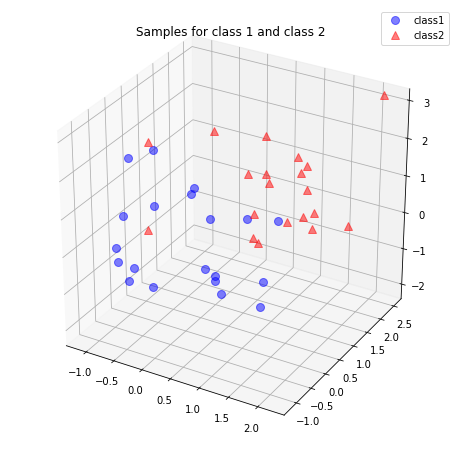

In [11]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

#  Taking the whole dataset ignoring the class labels

Because we don’t need class labels for the PCA analysis, let us merge the samples for our 2 classes into one 3×40-dimensional array.

In [8]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"


# Computing the d-dimensional mean vector

In [9]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.41667492]
 [0.69848315]
 [0.49242335]]


#  a) **Computing the Scatter Matrix**

In [14]:

scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[38.4878051  10.50787213 11.13746016]
 [10.50787213 36.23651274 11.96598642]
 [11.13746016 11.96598642 49.73596619]]


 **b) Computing the Covariance Matrix (alternatively to the scatter matrix)**<br
 Alternatively, instead of calculating the scatter matrix, we could also calculate the covariance matrix using the in-built numpy.cov() function. The equations for the covariance matrix and scatter matrix are very similar, the only difference is, that we use the scaling factor 1N−1 (here: 140−1=139) for the covariance matrix. Thus, their eigenspaces will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).

In [15]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[0.9868668  0.26943262 0.2855759 ]
 [0.26943262 0.92914135 0.30682016]
 [0.2855759  0.30682016 1.27528118]]


# Computing eigenvectors and corresponding eigenvalues

To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an assert statement into the code. Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [16]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.49210223]
 [-0.47927902]
 [-0.72672348]]
Eigenvalue 1 from scatter matrix: 65.16936779078195
Eigenvalue 1 from covariance matrix: 1.6710094305328695
Scaling factor:  39.00000000000002
----------------------------------------
Eigenvector 2: 
[[-0.64670286]
 [-0.35756937]
 [ 0.67373552]]
Eigenvalue 2 from scatter matrix: 32.69471296321796
Eigenvalue 2 from covariance matrix: 0.8383259734158451
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.58276136]
 [-0.8015209 ]
 [ 0.13399043]]
Eigenvalue 3 from scatter matrix: 26.596203282097097
Eigenvalue 3 from covariance matrix: 0.6819539303101816
Scaling factor:  39.00000000000002
----------------------------------------


**Checking the eigenvector-eigenvalue calculation** <br/>
Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation

ΣV=λv

where

Σ=Covariance matrix
v=Eigenvector
λ=Eigenvalue

In [18]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

**Visualizing the eigenvectors** <br/>
And before we move on to the next step, just to satisfy our own curiosity, we plot the eigenvectors centered at the sample mean.

Populating the interactive namespace from numpy and matplotlib


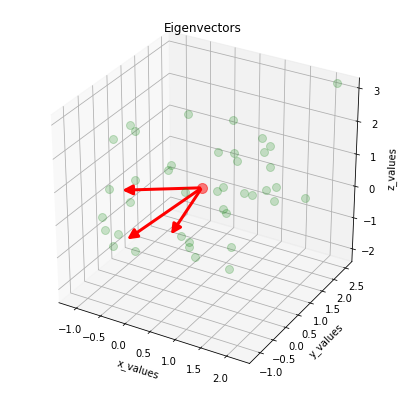

In [19]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

# 1. Sorting the eigenvectors by decreasing eigenvalues


We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto a smaller subspace, where the eigenvectors will form the axes of this new feature subspace. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which we can confirm by the following code:

In [20]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors
    

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [21]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

65.16936779078195
32.69471296321796
26.596203282097097


**5.2. Choosing k eigenvectors with the largest eigenvalues**

For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix WW.

In [22]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


# Transforming the samples onto the new subspace

In the last step, we use the 2×3-dimensional matrix W that we just computed to transform our samples onto the new subspace via the equation y=WT*x. where T stands for transpose 

In [23]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."


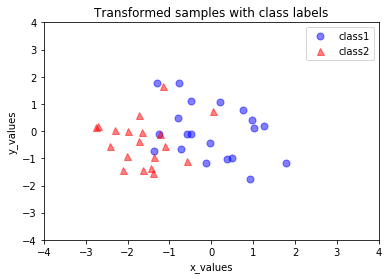

In [24]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

**Differences between the step by step approach and matplotlib.mlab.PCA()**

When we plot the transformed dataset onto the new 2-dimensional subspace, we observe that the scatter plots from our step by step approach and the matplotlib.mlab.PCA() class do not look identical. This is due to the fact that matplotlib.mlab.PCA() class **scales the variables to unit variance** prior to calculating the covariance matrices. This will/could eventually lead to different variances along the axes and affect the contribution of the variable to principal components.

One example where a scaling would make sense would be if one variable was measured in the unit **inches** where the other variable was measured in **cm**.
However, for our hypothetical example, we assume that both variables have the same (arbitrary) unit, so that we skipped the step of scaling the input data.

**Using the PCA() class from the sklearn.decomposition library to confirm our results**

In order to make sure that we have not made a mistake in our step by step approach, we will use another library that doesn’t rescale the input data by default.
Here, we will use the PCA class from the scikit-learn machine-learning library. The documentation can be found here:
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

For our convenience, we can directly specify to how many components we want to reduce our input dataset via the n_components parameter.

In [35]:
    n_components : int
    n_components : None or string 
    Number of components to keep. if n_components is not set all components are kept:
        n_components == min(n_samples, n_features)
        if n_components == ‘mle’, Minka’s MLE is used to guess the dimension if 0 < n_components < 1,
        select the number of components such that the amount of variance that needs to be explained
        is greater than the percentage specified by n_components

SyntaxError: invalid syntax (<ipython-input-35-19083c0ecd70>, line 3)

Next, we just need to use the .fit_transform() in order to perform the dimensionality reduction.



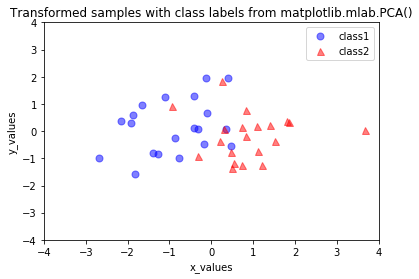

In [32]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

The plot above seems to be the exact mirror image of the plot from out step by step approach. This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by ×(−1) to revert the mirror image.

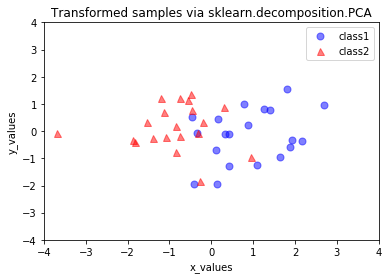

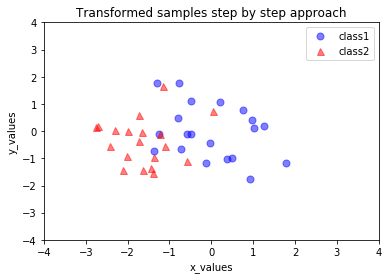

In [33]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()

Looking at the 2 plots above, the distributions along the component axes look identical, only the center of the data is slightly different. If we want to mimic the results produced by scikit-learn’s PCA class, we can subtract the mean vectors from the samples X to center the data at the coordinate system’s origin (thanks to a suggestion by Alexander Guth) – that is, replacing the transformation transformed = matrix_w.T.dot(all_samples) by transformed = matrix_w.T.dot(all_samples - mean_vector).

In [36]:
!pwd

/Users/sileshi/2_statistics_math_gd_pandas
